 # ETUDE SUR LES TENDANCES D'ACHAT DES CLIENTS

Notre objectif sera d'étudier le tendance d'achat des clients afin de permettre aux entreprises d'adapter leur espace de vennte mais également leur produits proposées à leur clientèle pour booster leur vente. 

#### Description des données 

Nous avons choisi un ensemble de variables pour mener notre étude. Parmi lesquelles nous avons 
Suivant la description des données , nous avons :

Customer ID :             Identifiant unique pour chaque client
Age :                      Âge du client
Gender :                   Genre du client (Homme/Femme)
Item Purchased :           L'article acheté par le client
Category :                 Catégorie de l'article acheté
Purchase Amount (USD) :    Le montant de l'achat en USD
Location :                 Lieu où l'achat a été effectué
Size :                     Taille de l'article acheté
Color :                    Couleur de l'article acheté
Season :                   Saison pendant laquelle l'achat a été effectué
Review Rating :            Note donnée par le client pour l'article acheté
Subscription Status :      Indique si le client dispose d'un abonnement (Oui/Non)
Shipping Type :            Type d'expédition choisi par le client
Discount Applied :         Indique si une remise a été appliquée à l'achat (Oui/Non)
Promo Code Used :          Indique si un code promotionnel a été utilisé pour l'achat (Oui/Non)
Previous Purchases :       Le nombre total de transactions conclues par le client au magasin, à l'exclusion de la transaction en cours
Payment Method :           ​​Mode de paiement préféré du client
Frequency of Purchases :   Fréquence à laquelle le client effectue des achats (par exemple, hebdomadaire, bimensuel, mensuel)



In [1]:
# Packages

import pandas as pd                 # for data manipulation and analysis
import numpy as np                  # for mathematical operations
import seaborn as sns               # for data visualization
import matplotlib.pyplot as plt     # for data visualization

In [27]:
# Importation des données

path = "C:/Users/HP/Downloads/archive (1)/shopping_trends_updated.csv"

shopping = pd.read_csv(path, sep= ",",
              na_values ="?" )

In [28]:
shopping

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## I _ Analyse exploiratoire des données

Aprés l'importation de notre jeu de données, nous avons vérifier si toutes nos variables étaient aux formats. Ensuite nous sommes passés à la vérification des données manquantes. Nous avons constaté que notre base ne comporte pas de données manquantes.

In [29]:
# Les types de variables

shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [30]:
# Transformation des variables objet en catégorie

for col in shopping.columns:
    if shopping[col].dtype == "object":
        shopping[col] = shopping[col].astype("category")
        
shopping.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   category
 3   Item Purchased          3900 non-null   category
 4   Category                3900 non-null   category
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   category
 7   Size                    3900 non-null   category
 8   Color                   3900 non-null   category
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   category
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   category
 14  Promo Code Used         

In [31]:
# Déterminons les valeurs manquantes 

na_shopping = shopping.isna().sum()
na_shopping.sort_values()

Customer ID               0
Previous Purchases        0
Promo Code Used           0
Discount Applied          0
Shipping Type             0
Subscription Status       0
Review Rating             0
Season                    0
Color                     0
Size                      0
Location                  0
Purchase Amount (USD)     0
Category                  0
Item Purchased            0
Gender                    0
Age                       0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## II_ Analyse statistique des données

####  1_ Statistiques descriptives des variables quantitatives

In [32]:
# Statistiques descriptives

shopping.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Nous constatons que la clientèle est agée au minimum de 18 ans et que environs 50% des clients dépassent la quarantaine. Le montant dépensé dans ces magazins varie entre 20 et 100 dollars et la valuer moyenne dépassent les 50 dollars. Au maximun 50 transactions sont réalisées entre les clients et le magazin.

####  1_ Représentation des modalités des variables qualitatives

<AxesSubplot:xlabel='Frequency of Purchases', ylabel='count'>

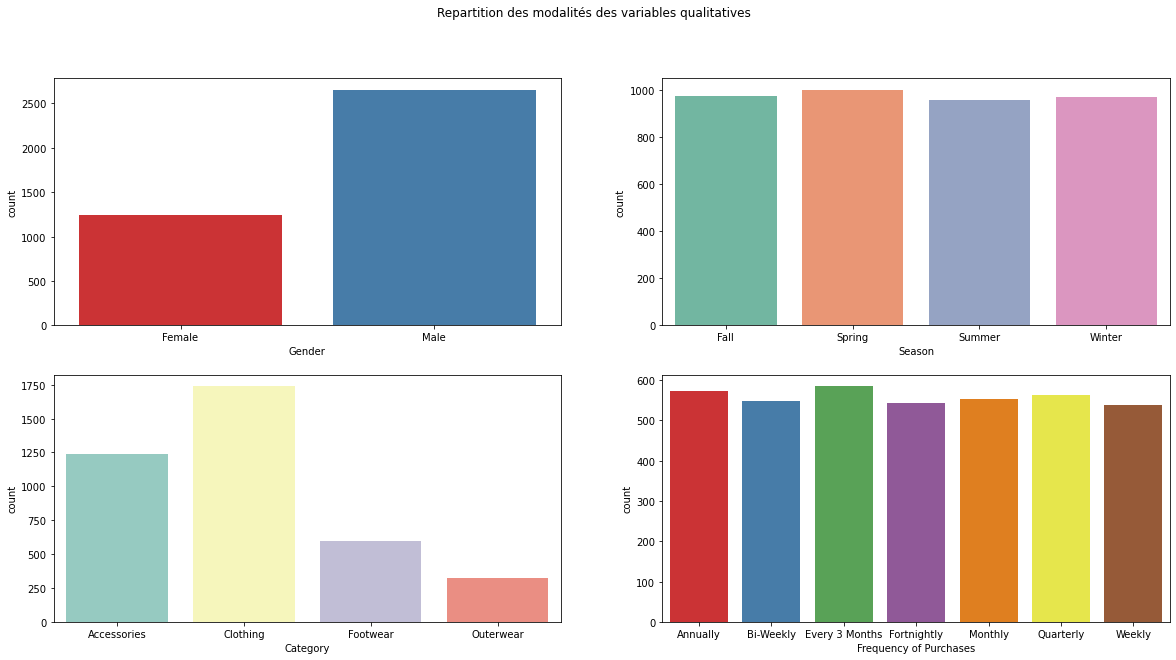

In [42]:
# Rprésentation graphique 

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Repartition des modalités des variables qualitatives')
sns.countplot(ax=axes[0,0], x="Gender", data = shopping, palette = "Set1")
sns.countplot(ax=axes[0,1], x="Season", data = shopping, palette = "Set2")
sns.countplot(ax=axes[1,0], x="Category", data = shopping, palette = "Set3")
sns.countplot(ax=axes[1,1], x="Frequency of Purchases", data = shopping, palette = "Set1")